# Objective : -

The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

They are used to predict the rating or preference that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

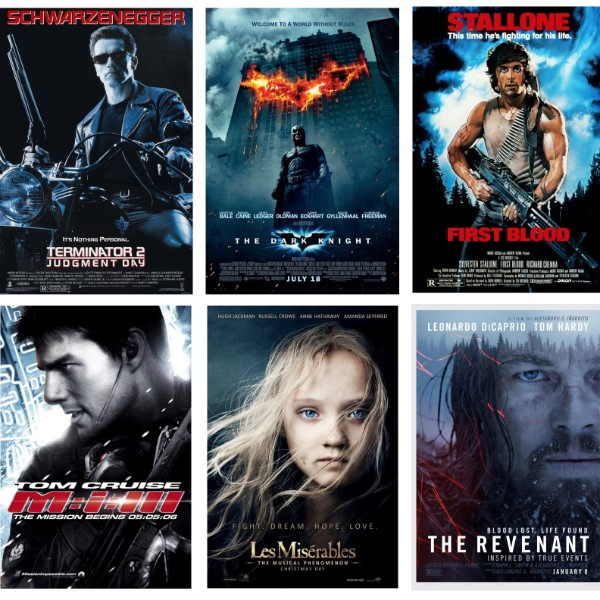

# Defination

`Content Based Recommendation ` - They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

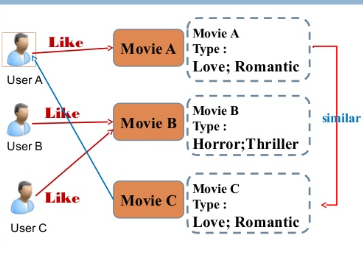

# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import ast
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

`Loading Data`

In [4]:
movies=pd.read_csv('movies_dataset.csv')
credits=pd.read_csv('movies_credits.csv')

# Data Overview

`The first dataset contains the following features` : -

- movie_id - A unique identifier for each movie.
- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.

`The second dataset has the following features` : -

- budget - The budget in which the movie was made.
- genre - The genre of the movie, Action, Comedy ,Thriller etc.
- homepage - A link to the homepage of the movie.
- id - This is infact the movie_id as in the first dataset.
- keywords - The keywords or tags related to the movie.
- original_language - The language in which the movie was made.
- original_title - The title of the movie before translation or adaptation.
- overview - A brief description of the movie.
- popularity - A numeric quantity specifying the movie popularity.
- production_companies - The production house of the movie.
- production_countries - The country in which it was produced.
- release_date - The date on which it was released.
- revenue - The worldwide revenue generated by the movie.
- runtime - The running time of the movie in minutes.
- status - "Released" or "Rumored".
- tagline - Movie's tagline.
- title - Title of the movie.
- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.

In [5]:
print(movies.shape)
movies.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# Since it will become hectic to work on two datasets, So we will merge it with the first one
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


`Merging of DataFrames`

In [7]:
movies=movies.merge(credits,on='title')

In [8]:
movies.shape

(4809, 23)

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

`Extract Out relevant Features from the Movies DataFrame ` : -

 `LIKE` -
 - Genres
 - Movie_id
 - Overview
 - Keywords
 - Cast- Consists director
 - Crew

In [10]:
movies=movies[['movie_id','title','keywords','overview','genres','cast','crew']]



In this recommender system the content of the movie (overview, cast, crew, keyword, tagline,overview etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.



In [11]:
movies.head()

,movie_id,title,keywords,overview,genres,cast,crew
0,19995,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


`Missing Values `

In [12]:
#check null values
movies.isnull().sum()

movie_id    0
title       0
keywords    0
overview    3
genres      0
cast        0
crew        0
dtype: int64

In [13]:
movies=movies.dropna()

In [14]:
movies.shape

(4806, 7)

`Duplicated Values`

In [15]:
movies.duplicated().sum()

0

# Tags Creation

In [17]:
# ast.literal_eval convert string into list
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"},{"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

- Now ,we'll write custom functions to get relevant information from each feature.

In [18]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [19]:
movies['genres']=movies['genres'].apply(convert)

In [20]:
movies.head()

,movie_id,title,keywords,overview,genres,cast,crew
0,19995,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
#Keywords
movies['keywords']=movies['keywords'].apply(convert)

In [22]:
movies.head()

,movie_id,title,keywords,overview,genres,cast,crew
0,19995,Avatar,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [23]:
#cast
def convert_cast(obj):
    L=[]
    count=0
    for i in ast.literal_eval(obj):
        if count!=3:
            L.append(i['name'])
            count+=1
        else:
            break
    return L

In [24]:
movies['cast']=movies['cast'].apply(convert_cast)

In [25]:
movies.head()

,movie_id,title,keywords,overview,genres,cast,crew
0,19995,Avatar,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
#crew
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
            break
    return L

In [27]:
movies['crew']=movies['crew'].apply(fetch_director)

In [28]:
movies.head()

,movie_id,title,keywords,overview,genres,cast,crew
0,19995,Avatar,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[spy, based on novel, secret agent, sequel, mi...",A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...",Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[based on novel, mars, medallion, space travel...","John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [29]:
#Overview-convert into lists so that we can concatenate it with other cols except movie_id,title
movies['overview']=movies['overview'].apply(lambda x: x.split())

In [30]:
movies.head()

,movie_id,title,keywords,overview,genres,cast,crew
0,19995,Avatar,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


Since in some of our cols first name is repeated, So as  to avoid the confusion of our 
recommender system, we must remove the space between first and last name.

In [31]:

movies['keywords']=movies['keywords'].apply(lambda x: [i.replace(" ","") for i in x])
movies['genres']=movies['genres'].apply(lambda x: [i.replace(" ","") for i in x])
movies['cast']=movies['cast'].apply(lambda x: [i.replace(" ","") for i in x])
movies['crew']=movies['crew'].apply(lambda x: [i.replace(" ","") for i in x])

In [32]:
movies.head()

,movie_id,title,keywords,overview,genres,cast,crew
0,19995,Avatar,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [33]:
#Concatenate all required cols into tags
movies['tags']=movies['keywords'] + movies['overview'] +movies['genres'] +movies['cast'] +movies['crew'] 

In [34]:
movies.head()

,movie_id,title,keywords,overview,genres,cast,crew,tags
0,19995,Avatar,"[cultureclash, future, spacewar, spacecolony, ...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[cultureclash, future, spacewar, spacecolony, ..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drugabuse, exoticisland, eastindiatrad...","[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[ocean, drugabuse, exoticisland, eastindiatrad..."
2,206647,Spectre,"[spy, basedonnovel, secretagent, sequel, mi6, ...","[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[spy, basedonnovel, secretagent, sequel, mi6, ..."
3,49026,The Dark Knight Rises,"[dccomics, crimefighter, terrorist, secretiden...","[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[dccomics, crimefighter, terrorist, secretiden..."
4,49529,John Carter,"[basedonnovel, mars, medallion, spacetravel, p...","[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[basedonnovel, mars, medallion, spacetravel, p..."


In [35]:
new_df=movies[['movie_id','title','tags']]
new_df

,movie_id,title,tags
0,19995,Avatar,"[cultureclash, future, spacewar, spacecolony, ..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drugabuse, exoticisland, eastindiatrad..."
2,206647,Spectre,"[spy, basedonnovel, secretagent, sequel, mi6, ..."
3,49026,The Dark Knight Rises,"[dccomics, crimefighter, terrorist, secretiden..."
4,49529,John Carter,"[basedonnovel, mars, medallion, spacetravel, p..."
...,...,...,...
4804,9367,El Mariachi,"[unitedstates–mexicobarrier, legs, arms, paper..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[date, loveatfirstsight, narration, investigat..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [36]:
#convert tags into string
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))


In [37]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,cultureclash future spacewar spacecolony socie...
1,285,Pirates of the Caribbean: At World's End,ocean drugabuse exoticisland eastindiatradingc...
2,206647,Spectre,spy basedonnovel secretagent sequel mi6 britis...
3,49026,The Dark Knight Rises,dccomics crimefighter terrorist secretidentity...
4,49529,John Carter,basedonnovel mars medallion spacetravel prince...


In [38]:
#Now, it is recommended to have your tags string in lower case.
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

In [39]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,cultureclash future spacewar spacecolony socie...
1,285,Pirates of the Caribbean: At World's End,ocean drugabuse exoticisland eastindiatradingc...
2,206647,Spectre,spy basedonnovel secretagent sequel mi6 britis...
3,49026,The Dark Knight Rises,dccomics crimefighter terrorist secretidentity...
4,49529,John Carter,basedonnovel mars medallion spacetravel prince...


- Now we'll be using PorterStemmer to avoids all the repeating words in the data.

In [41]:
ps=PorterStemmer()
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [42]:
new_df['tags']=new_df['tags'].apply(stem)
new_df.head()

,movie_id,title,tags
0,19995,Avatar,cultureclash futur spacewar spacecoloni societ...
1,285,Pirates of the Caribbean: At World's End,ocean drugabus exoticisland eastindiatradingco...
2,206647,Spectre,spi basedonnovel secretag sequel mi6 britishse...
3,49026,The Dark Knight Rises,dccomic crimefight terrorist secretident burgl...
4,49529,John Carter,basedonnovel mar medallion spacetravel princes...


# Vectorization(Using CountVectorizer)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')
vectors=cv.fit_transform(new_df['tags']).toarray()
cv.get_feature_names()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

- We use CountVectorizer to Convert Text data into Numerical Data, with maximum features as 5000 and avoiding all english stop words.

In [46]:
#Now we will find similarity b/w different movies,by using cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

`We see that over 5,000 different words were used to describe the 4800 movies in our dataset.

With this matrix in hand, we can now compute a similarity score. There are several ways for this; such as the euclidean, the Pearson and the cosine similarity scores. There is no right answer to which score is the best. Different scores work well in different scenarios and it is often a good idea to experiment with different metrics.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate. Mathematically, it is defined as follows:`


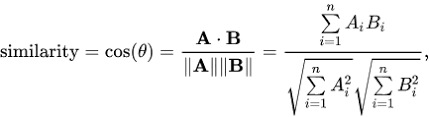

In [47]:
Similarity=cosine_similarity(vectors)
Similarity

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

`Using Cosine Similarity ,we have determined the similarity score. 

The similarity score is lies in the range of 0 to 1 in which 1 indicates the highest and 0 be the lowest similarity between the two movies.`

In [48]:
movie_index=new_df[new_df['title']=='Avatar'].index[0]
Similarity[movie_index]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [51]:
sorted(list(enumerate(Similarity[movie_index])),reverse=True,key=lambda x:x[1])[1:6]

[(1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

`We are now in a good position to define our recommendation function. These are the following steps we'll follow :-

- Get the index of the movie given its title.
- Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
- Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
- Get the top 5 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
- Return the titles corresponding to the indices of the top elements.`

# Recommend Movies

In [52]:
def recommend(movie):
    movie_index=new_df[new_df['title']==movie].index[0]
    distances=Similarity[movie_index]
    movie_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
   
    for i in movie_list:
        print(new_df.iloc[i[0]].title)

We can now reuse our recommend() function by passing movie as the arguement.

In [53]:
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [54]:
recommend('John Carter')

Riddick
Krrish
The Other Side of Heaven
The Legend of Hercules
Get Carter


We can see that our recommender system  capturing almost similar kinds of movies. 
Now , all the movie fans can easily access 
their movies of their favorite actor,genre, director etc.

# App Conversion

In [233]:
import pickle as pkl

In [235]:
pkl.dump(new_df,open('movies.pkl','wb'))

In [236]:
new_df['title'].values

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., 'Signed, Sealed, Delivered', 'Shanghai Calling',
       'My Date with Drew'], dtype=object)

In [237]:
pkl.dump(Similarity,open('similarity.pkl','wb'))